### Surface albedo measurements

In [18]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Load surface radiation measurements

In [190]:
# Set your username and token 
username = 'yxie'
token = '8bb157033dfd0a5'

# Set the datastream and start/enddates
datastream = 'gucsebsM1.b1'

# Event #1 at January 2, 2022
startdate1 = '2022-01-02'
enddate1 = '2022-01-07'

# Event #2 at January 25, 2022
startdate2 = '2022-01-25'
enddate2 = '2022-01-30'

# Event #3 at April 3, 2023
startdate3 = '2023-04-03'
enddate3 = '2023-04-08'

# We are looking at 5 days after the event
numdate = 6

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result1 = act.discovery.download_arm_data(username, token, datastream, startdate1, enddate1)
result2 = act.discovery.download_arm_data(username, token, datastream, startdate2, enddate2)
result3 = act.discovery.download_arm_data(username, token, datastream, startdate3, enddate3)



[DOWNLOADING] gucsebsM1.b1.20220102.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220103.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220104.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220105.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220106.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220107.000000.cdf

If you use these data to prepare a publication, please cite:

Sullivan, R., Keeler, E., Pal, S., & Kyrouac, J. Surface Energy Balance System
(SEBS). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1984921

[DOWNLOADING] gucsebsM1.b1.20220125.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220126.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220127.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220128.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220129.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220130.000000.cdf

If you use these data to prepare a publication, please cite:

Sullivan, R., Keeler, E., Pal, S., & Kyrouac, J. Surface Energy Balance System
(SEBS). Atmospheric Radiation Measurement (ARM) User Fac

In [191]:
# Let's read in the data using ACT and check out the data
ds_rad1 = act.io.read_arm_netcdf(result1)
ds_rad2 = act.io.read_arm_netcdf(result2)
ds_rad3 = act.io.read_arm_netcdf(result3)

In [192]:
# Quality Check the data
# Remove the bad data
ds_rad1.clean.cleanup()
#ds_rad = act.qc.arm.add_dqr_to_qc(ds_rad)
ds_rad1.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_rad2.clean.cleanup()
ds_rad2.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_rad3.clean.cleanup()
ds_rad3.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)


In [193]:
# check the data structure
ds_rad1

<xarray.Dataset> Size: 85kB
Dimensions:                        (time: 288)
Coordinates:
  * time                           (time) datetime64[ns] 2kB 2022-01-02 ... 2...
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 2kB 2022-01-02 ... 2...
    time_offset                    (time) datetime64[ns] 2kB 2022-01-02 ... 2...
    qc_time                        (time) int32 1kB dask.array<chunksize=(48,), meta=np.ndarray>
    down_short_hemisp              (time) float32 1kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 1kB 0 2 2 2 2 2 ... 0 0 0 0 0 0
    up_short_hemisp                (time) float32 1kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 1kB 0 0 0 0 0 0 ... 0 0 0 0 0 0
    battery_voltage                (time) float32 1kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 1kB 0 0 0 0 0 0 ... 0 0 0 0 0 0
    lat                            (time) float32 1kB 38.96 38.96 ... 38.96
    lon                            (time) float32 1kB -107.0 -107.0 ... -107.0
    alt                            (time) float32 1kB 2.886e+03 ... 2.886e+03
Attributes: (12/22)
    command_line:            sebs_ingest -s guc -f M1
    process_version:         ingest-sebs-1.6-0.el7
    ingest_software:         ingest-sebs-1.6-0.el7
    dod_version:             sebs-b1-1.4
    site_id:                 guc
    facility_id:             M1: Mt Crested Butte, Colorado
    ...                      ...
    datastream:              gucsebsM1.b1
    history:                 created by user dsmgr on machine procnode2 at 20...
    _file_dates:             ['20220102', '20220103', '20220104', '20220105',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             gucsebsM1.b1
    _arm_standards_flag:     1

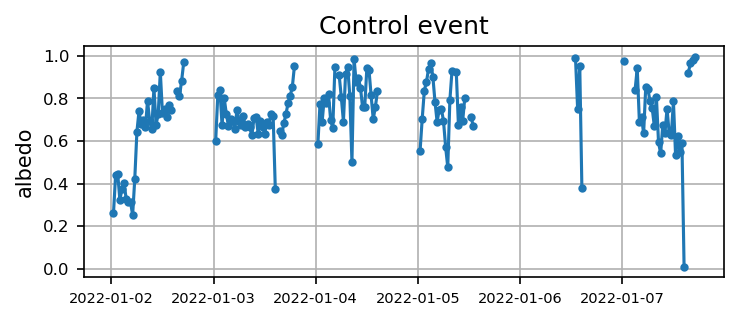

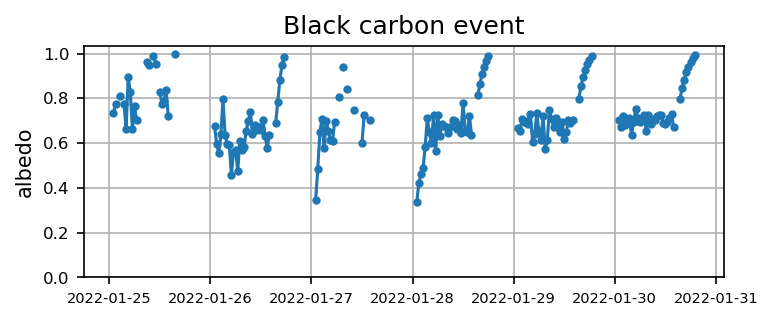

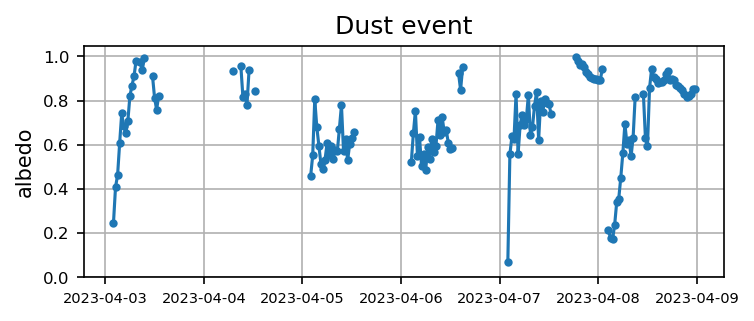

In [224]:
# Visualize the SEBS albedo measurement
plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad1['time'], ds_rad1['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Control event')
plt.show()

plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad2['time'], ds_rad2['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Black carbon event')
plt.show()

plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad3['time'], ds_rad3['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Dust event')
plt.show()


### Compute the daily albedo

In [196]:
daily_swdn1 = ds_rad1["down_short_hemisp"].groupby("time.day").mean()
daily_swup1 = ds_rad1["up_short_hemisp"].groupby("time.day").mean()
daily_alb1 = daily_swup1 / daily_swdn1

daily_swdn2 = ds_rad2["down_short_hemisp"].groupby("time.day").mean()
daily_swup2 = ds_rad2["up_short_hemisp"].groupby("time.day").mean()
daily_alb2 = daily_swup2 / daily_swdn2

daily_swdn3 = ds_rad3["down_short_hemisp"].groupby("time.day").mean()
daily_swup3 = ds_rad3["up_short_hemisp"].groupby("time.day").mean()
daily_alb3 = daily_swup3 / daily_swdn3


In [204]:
print("Control event: ")
print(daily_alb1.values)

print("Black carbon event: ")
print(daily_alb2.values)

print("Dust event: ")
print(daily_alb3.values)

Control event: 
[1.0085437 0.9353342 1.0606952 1.1239946 1.1336114 1.0593574]
Black carbon event: 
[1.092211  1.0429021 1.0889456 1.0354402 1.0187626 1.0055703]
Dust event: 
[1.0760224 1.1429528 1.0815936 1.0035297 0.9791858 0.8345441]


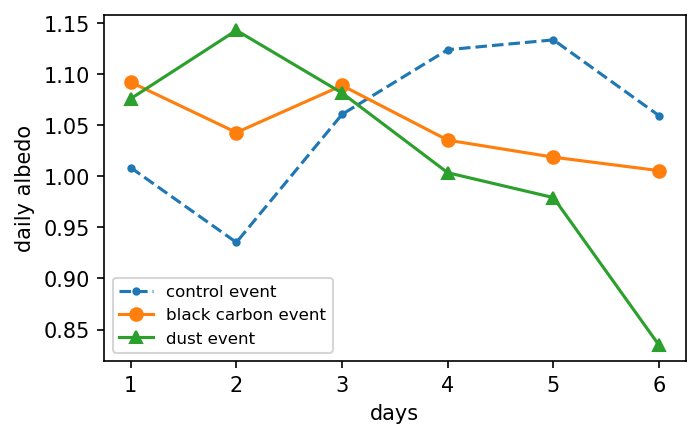

In [225]:
plt.figure(figsize=(5,3), dpi=150)

plt.plot(np.arange(1,7), daily_alb1, '.--', label='control event')
plt.plot(np.arange(1,7), daily_alb2, 'o-', label='black carbon event')
plt.plot(np.arange(1,7), daily_alb3, '^-', label='dust event')

plt.xlabel('days')
plt.ylabel('daily albedo')
plt.legend(fontsize=8)


### Remove the diurnal cycle

In [149]:
# calculate the mean by hour of each day
ds_rad["albedo"].groupby("time.hour").mean()

<xarray.DataArray 'albedo' (hour: 24)> Size: 96B
dask.array<stack, shape=(24,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * hour     (hour) int64 192B 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
Attributes:
    long_name:            Albedo
    units:                fraction
    resolution:           0.01
    ancillary_variables:  qc_albedo
    history:              act.qc.datafilter: Value is equal to missing_value....

In [137]:
# convert xarray to numpy array
albnew = ds_rad["albedo"].to_numpy()
albnew_mean = np.nanmean(np.reshape(albnew, (48, numdate)), axis=1)

/tmp/ipykernel_889/3833715621.py:2: RuntimeWarning: Mean of empty slice
  albnew_mean = np.nanmean(np.reshape(albnew, (48, numdate)), axis=1)


In [138]:
albnew_mean

array([0.7546998 , 0.78627324, 0.7391871 , 0.9564656 , 0.9254629 ,
       0.78026956, 0.9990803 ,        nan,        nan,        nan,
       0.6529938 , 0.5685541 , 0.5619452 , 0.68203145, 0.6654394 ,
       0.63507694, 0.8997505 ,        nan,        nan, 0.4155189 ,
       0.65742755, 0.68151975, 0.8915504 , 0.7463517 , 0.6756153 ,
              nan,        nan,        nan,        nan, 0.426916  ,
       0.65423656, 0.65689987, 0.67782056, 0.684446  , 0.6697173 ,
       0.89897907, 0.9886965 ,        nan, 0.6659013 , 0.6879279 ,
       0.67221844, 0.6544498 , 0.6877172 , 0.67176163, 0.7859972 ,
       0.9474498 ,        nan,        nan], dtype=float32)

In [139]:
# Remove the diurnal cycle from the surface albedo
alb = albnew - np.repeat(albnew_mean, numdate)
alb.shape

(240,)

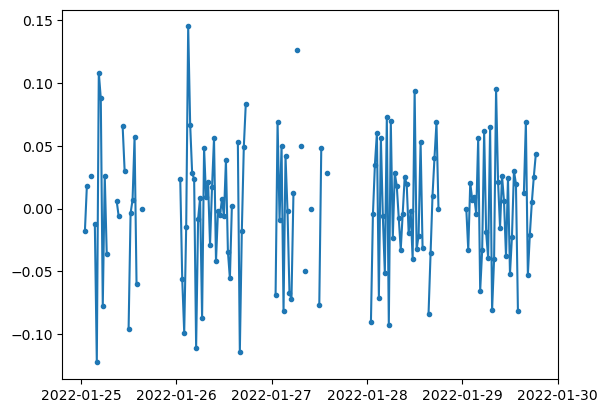

In [140]:
plt.plot(ds_rad['time'], alb, '.-')